# EDA CASE STUDY


## PROBLEM STATEMENT : Prediction of the loan defaulter customer from the retail  company data.

### Importing libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data as df

In [16]:
df=pd.read_csv("G:\Projects\loan.csv",low_memory=False)
pd.set_option("display.max_columns",None)

In [17]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [18]:
df.head().T

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
...,...,...,...,...,...
tax_liens,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,NaN,NaN,NaN,NaN,NaN
total_bc_limit,NaN,NaN,NaN,NaN,NaN


## Data Understanding
      

In [19]:
df.shape

(39717, 111)

In [20]:
for i in df.columns:
    print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

 * We get to know that it is avery big dataset. It have 111 columns.We analyse data on some specific columns.

### Missing values

In [21]:
#Creating an empty list to store columns with more than 50% null values
null_columns = []

#Iterating through each column in the DataFrame
for x in df:
    # Calculate the percentage of missing values for each column
    null_val = df[x].isnull().mean() * 100
    # If the percentage of missing values is greater than 50%, add column name and percent missing to the list
    if null_val > 50:
        null_columns.append({'Column_Name': x, 'Percent_Missing': null_val})

# Creating dataFrame from the list of columns with more than 50% missing values
null_df = pd.DataFrame(null_columns)
print(len(null_df))
null_df

57


,Column_Name,Percent_Missing
0,mths_since_last_delinq,64.662487
1,mths_since_last_record,92.985372
2,next_pymnt_d,97.129693
3,mths_since_last_major_derog,100.000000
4,annual_inc_joint,100.000000
5,dti_joint,100.000000
6,verification_status_joint,100.000000
7,tot_coll_amt,100.000000
8,tot_cur_bal,100.000000
9,open_acc_6m,100.000000


In [22]:
drop_cols = list(null_df['Column_Name'])
len(drop_cols)

57

### there are 57 columns in which missing value are greater than 50% .We drop these columns.

In [23]:
df.drop(drop_cols,axis=1,inplace=True)

In [24]:
df.shape

(39717, 54)

### unique values in columns 

In [25]:
unique=df.nunique()
unique=unique[unique.values == 1]
df.drop(labels = list(unique.index), axis =1,inplace=True)

In [26]:
# No need of this columns

drop_column = ["id","member_id","url","zip_code"]
df.drop(labels = drop_column, axis =1, inplace=True)
print(df.shape ,":rows & columns.")

(39717, 41) :rows & columns.


### Modifying these columns 

In [27]:
###interest rate column
df['int_rate']=(df['int_rate'].str.strip('%').astype(float))

In [28]:
##convert these columns into numerical
num_col = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
df[num_col] = df[num_col].apply(pd.to_numeric)

# univariate analysis

In [29]:
need_columns=['loan_amnt','funded_amnt','int_rate','home_ownership','annual_inc','loan_status','purpose']

### loan Purpose 

In [31]:
df.groupby('purpose')['purpose'].count()

purpose
car                    1549
credit_card            5130
debt_consolidation    18641
educational             325
home_improvement       2976
house                   381
major_purchase         2187
medical                 693
moving                  583
other                  3993
renewable_energy        103
small_business         1828
vacation                381
wedding                 947
Name: purpose, dtype: int64

In [33]:
#Loan purpose 
(df.purpose.value_counts()*100)/len(df)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [35]:
# Purpose of loan : Drop records where values are less than 0.95

del_loan_purpose = (df.purpose.value_counts()*100)/len(df)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.95) | (del_loan_purpose.index == 'other')]
del_loan_purpose

other               10.053629
educational          0.818289
renewable_energy     0.259335
Name: purpose, dtype: float64

In [36]:
df.drop(labels = df[df.purpose.isin(del_loan_purpose.index)].index, inplace=True)

In [37]:
print(df.purpose.unique())

['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house']


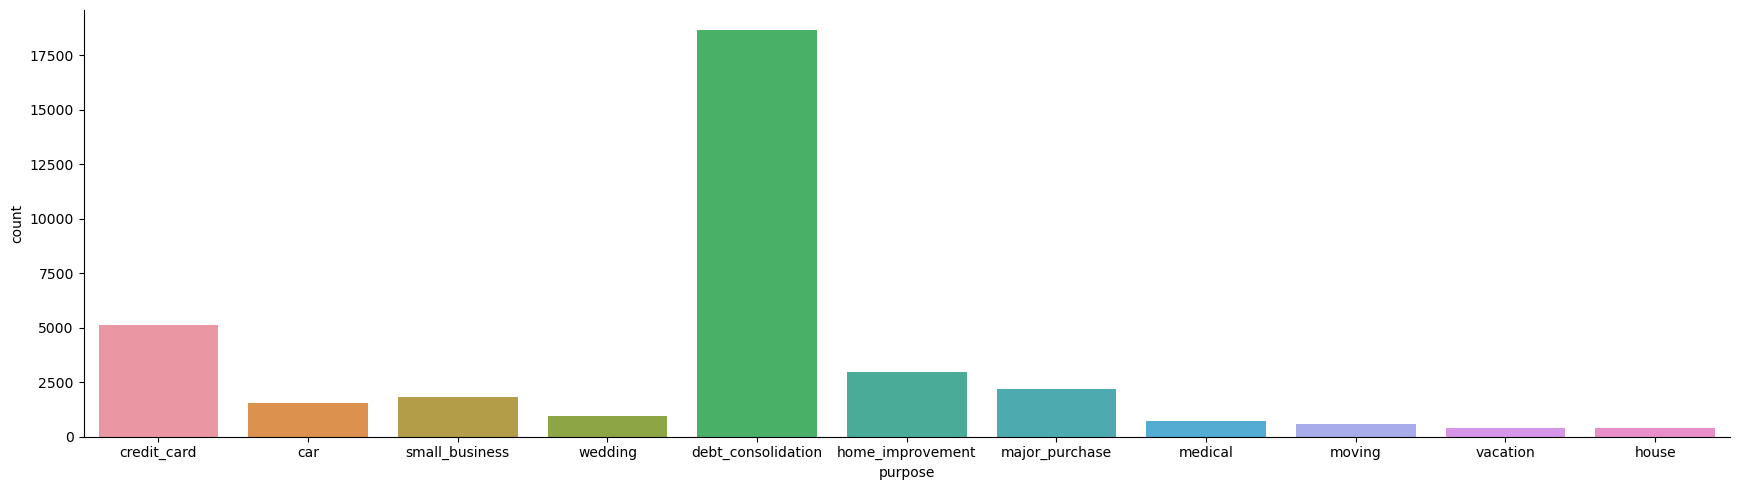

In [39]:
sns.catplot(x="purpose", kind="count", data=df,height=5, aspect=3.5)

* More than 16000 people have taken loan for debt_consolidation.
* Around 5000 people have loans on credit card.

## COUNTING LOAN STATUS

In [41]:
##count_loan status
df.loan_status.value_counts()*100/len(df)

Fully Paid     83.199229
Charged Off    13.936423
Current         2.864347
Name: loan_status, dtype: float64

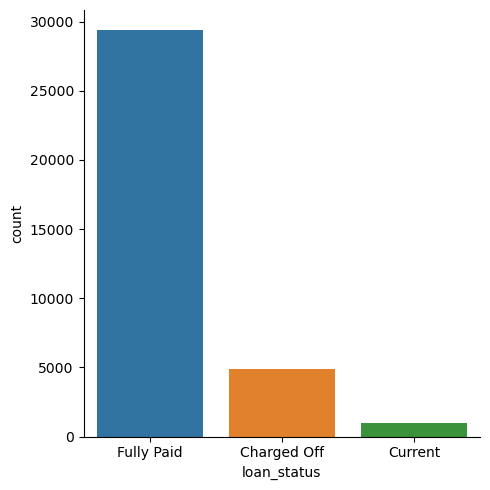

In [42]:
sns.catplot(x="loan_status", kind="count", data=df)

* From above graph  2% customer chrged_off from the distribution.

# Loan amount analysis

C:\Users\Amit Ranjan\AppData\Local\Temp\ipykernel_18452\3196562268.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],ax=ax[0],color='blue')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: title={'center': 'Box Plot'}, xlabel='loan_amnt'>

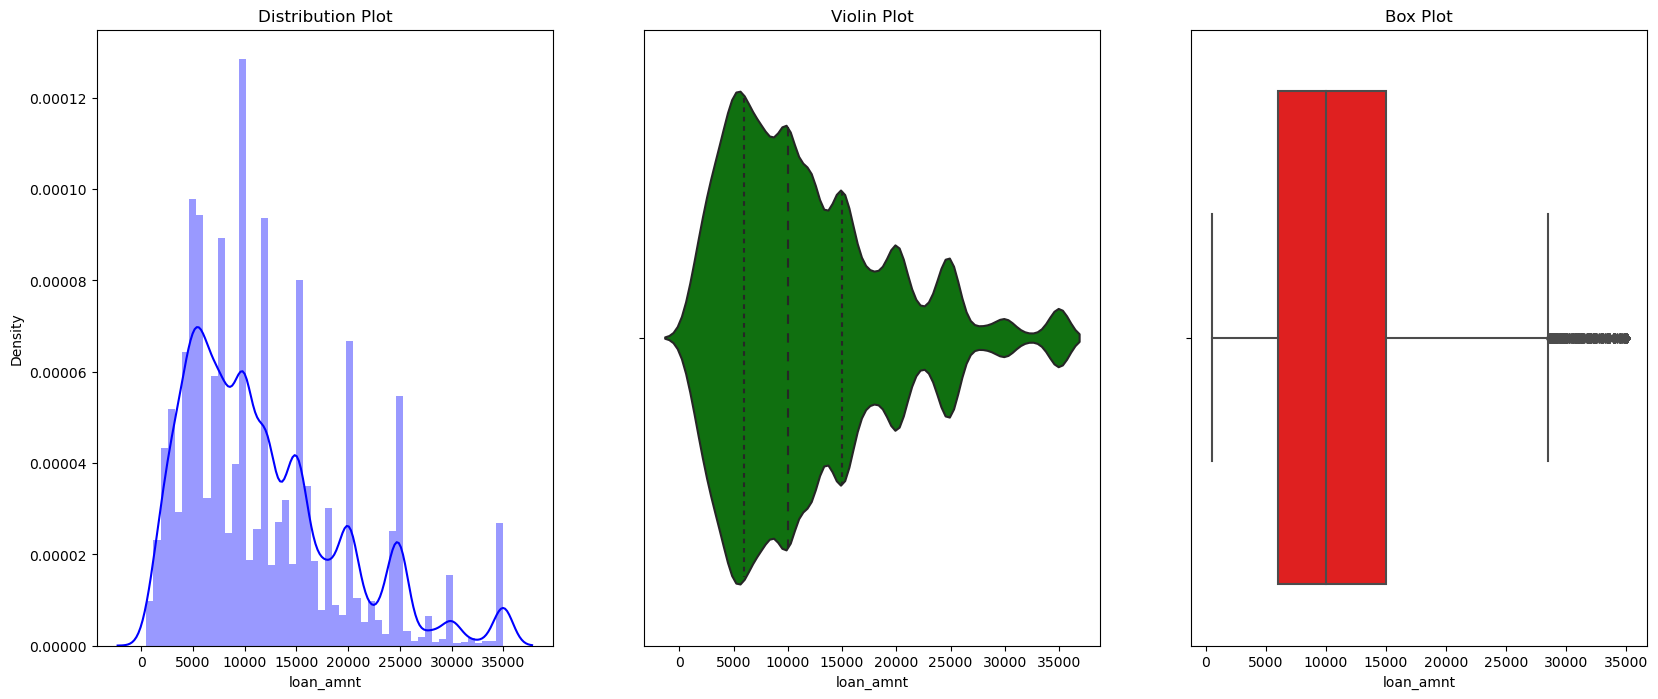

In [44]:
## plotting loan amount 
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(df['loan_amnt'],ax=ax[0],color='blue')
ax[1].set_title("Violin Plot")
sns.violinplot(data=df,x='loan_amnt',ax=ax[1],inner='quartile',color='green')
ax[2].set_title("Box Plot")
sns.boxplot(data=df,x='loan_amnt',ax=ax[2],orient='v',color='red')

* from above following plots we came to know that 75% of the loan amount lie between 5000-15000

# Aanual income

C:\Users\Amit Ranjan\AppData\Local\Temp\ipykernel_18452\868087628.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['annual_inc'],ax=ax[0],color='blue')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: title={'center': 'Box Plot'}, xlabel='annual_inc'>

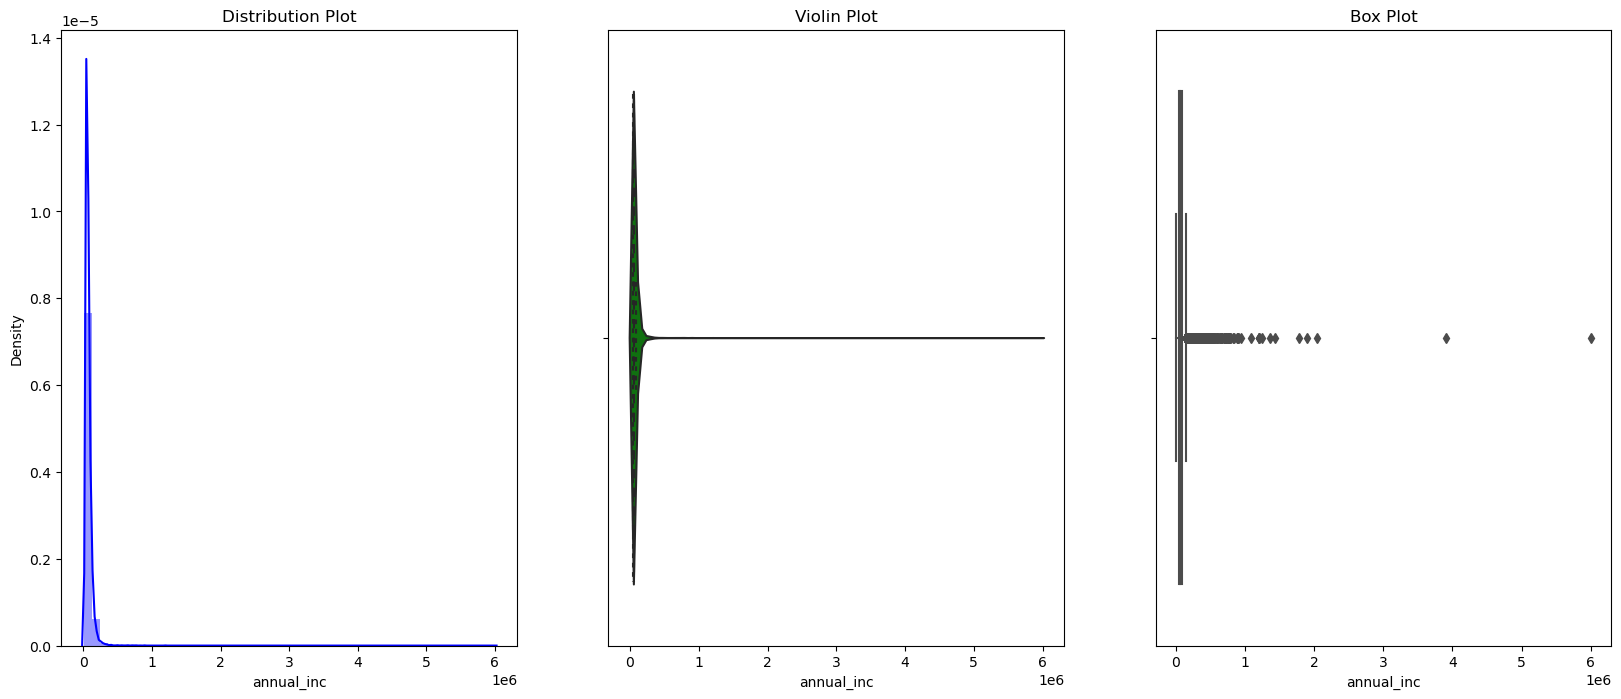

In [45]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(df['annual_inc'],ax=ax[0],color='blue')
ax[1].set_title("Violin Plot")
sns.violinplot(data=df,x='annual_inc',ax=ax[1],inner='quartile',color='green')
ax[2].set_title("Box Plot")
sns.boxplot(data=df,x='annual_inc',ax=ax[2],orient='v',color='red')

* There are so many extreme values and outliers in anual incomes so it will be better  to concider this feature.

### Removing outliers

In [46]:
qua = df["annual_inc"].quantile(0.90)
df = df[df["annual_inc"] < qua]
df['annual_inc'].describe()

count     31765.000000
mean      58134.901685
std       23606.912877
min        4080.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      117400.000000
Name: annual_inc, dtype: float64

### Plot anual_income 

C:\Users\Amit Ranjan\AppData\Local\Temp\ipykernel_18452\868087628.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['annual_inc'],ax=ax[0],color='blue')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: title={'center': 'Box Plot'}, xlabel='annual_inc'>

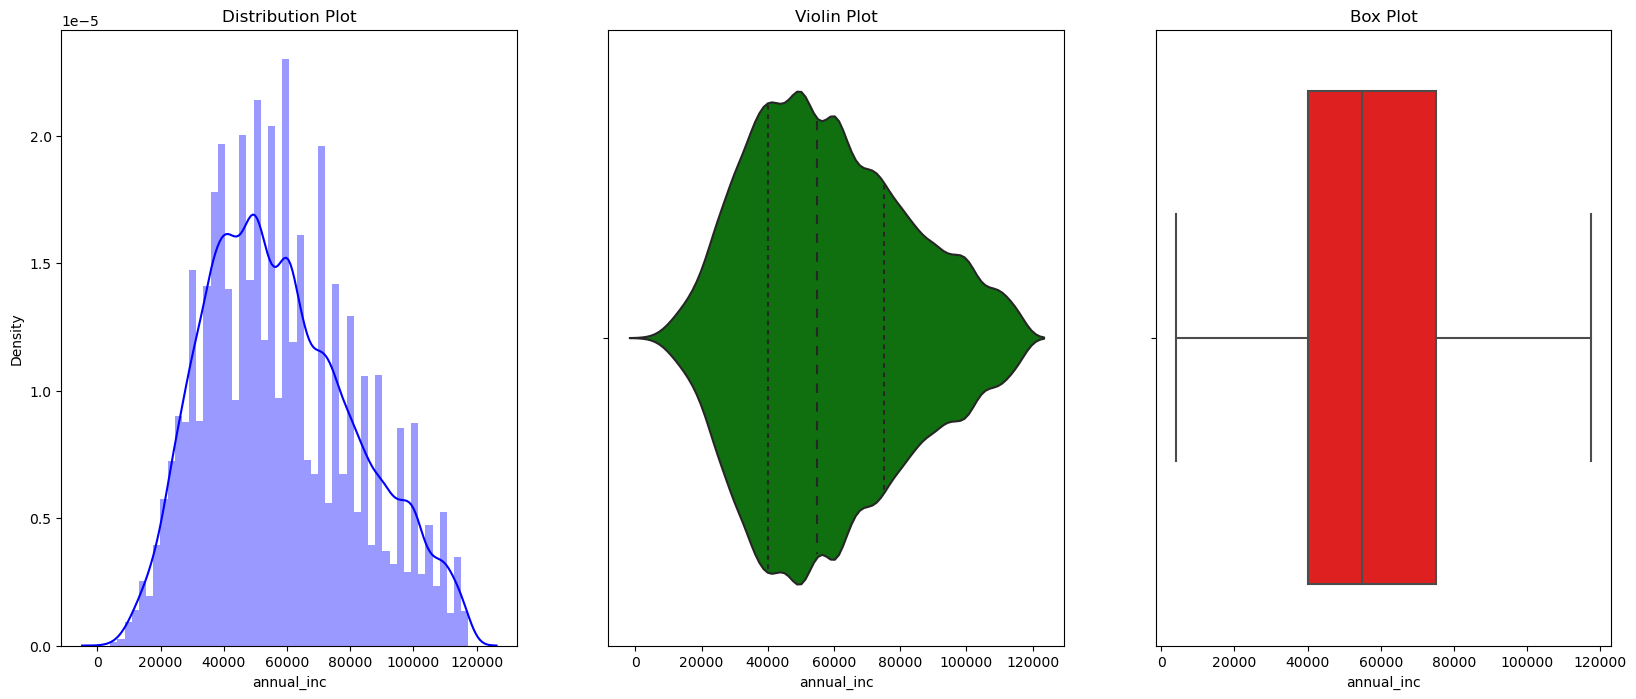

In [47]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(df['annual_inc'],ax=ax[0],color='blue')
ax[1].set_title("Violin Plot")
sns.violinplot(data=df,x='annual_inc',ax=ax[1],inner='quartile',color='green')
ax[2].set_title("Box Plot")
sns.boxplot(data=df,x='annual_inc',ax=ax[2],orient='v',color='red')

* From the graph we can say around 75% of the data have anual income between 40000 - 78000 anually.

## Bivariate analysis

### Analysis between purpose and loan status .

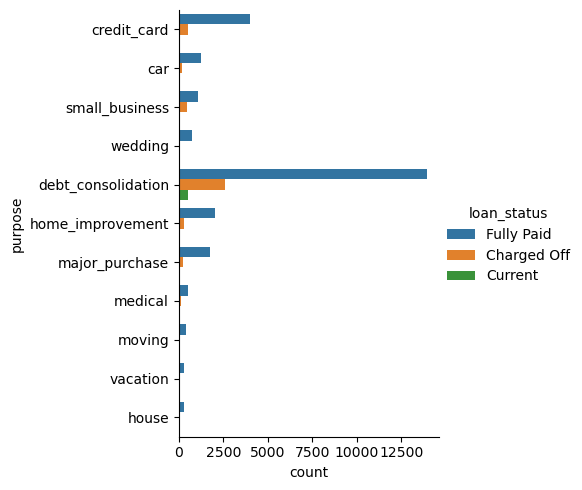

In [48]:
sns.catplot(y="purpose", hue="loan_status", kind="count",
            data=df)

* approx 85% of the applicants applied loan for paying their debt_consolidations.

# Home_ownership vs Loan_status

In [49]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [50]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE']
df.drop(df[df['home_ownership'].isin(rem)].index,inplace=True)
df.home_ownership.unique()

C:\Users\Amit Ranjan\AppData\Local\Temp\ipykernel_18452\1131425107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['home_ownership'].isin(rem)].index,inplace=True)


array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

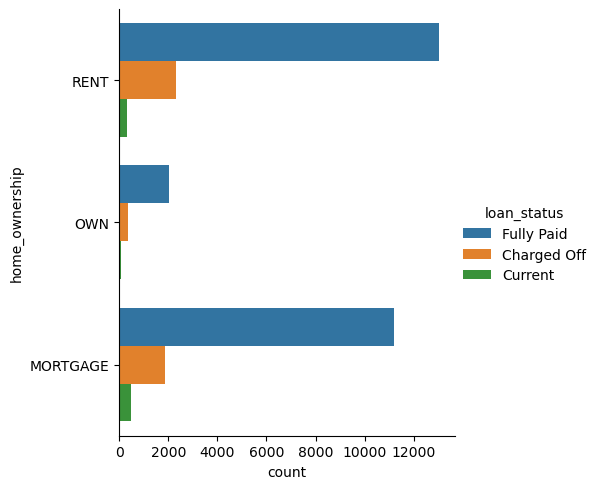

In [51]:
sns.catplot(y='home_ownership', hue="loan_status", kind="count",data=df)

* Around 33% rent customers are fully paid lenders

# Loan_status vs Term

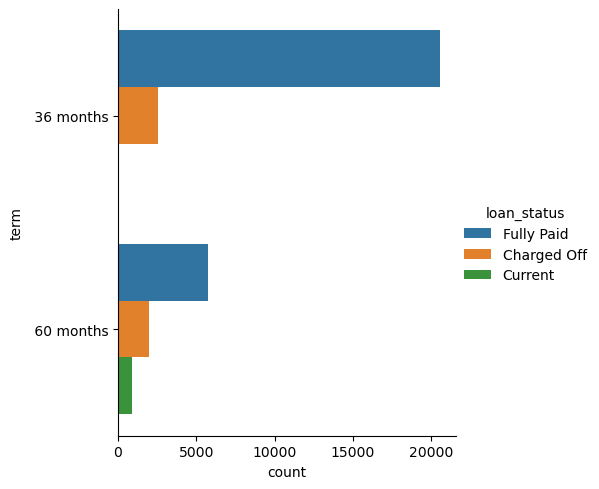

In [52]:
sns.catplot(y='term', hue="loan_status", kind="count",data=df)

* 68% customers fully paid  the loan in the term period of 36months

## Loan_status vs Verification_status

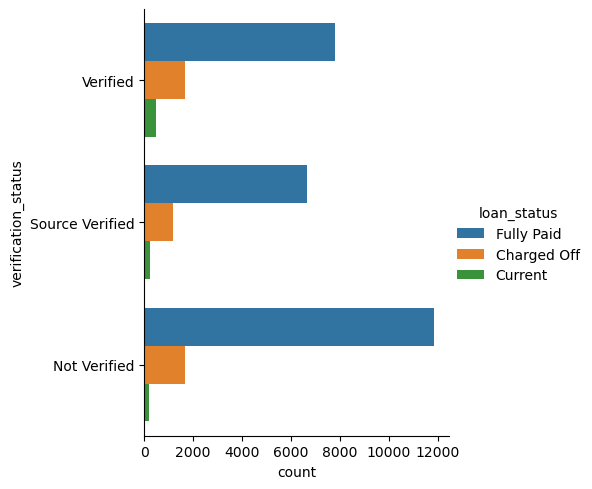

In [53]:
sns.catplot(y='verification_status', hue="loan_status", kind="count",data=df)

* around 62%  people are not verified and fully paid their loan 

# Data vs Loan amount

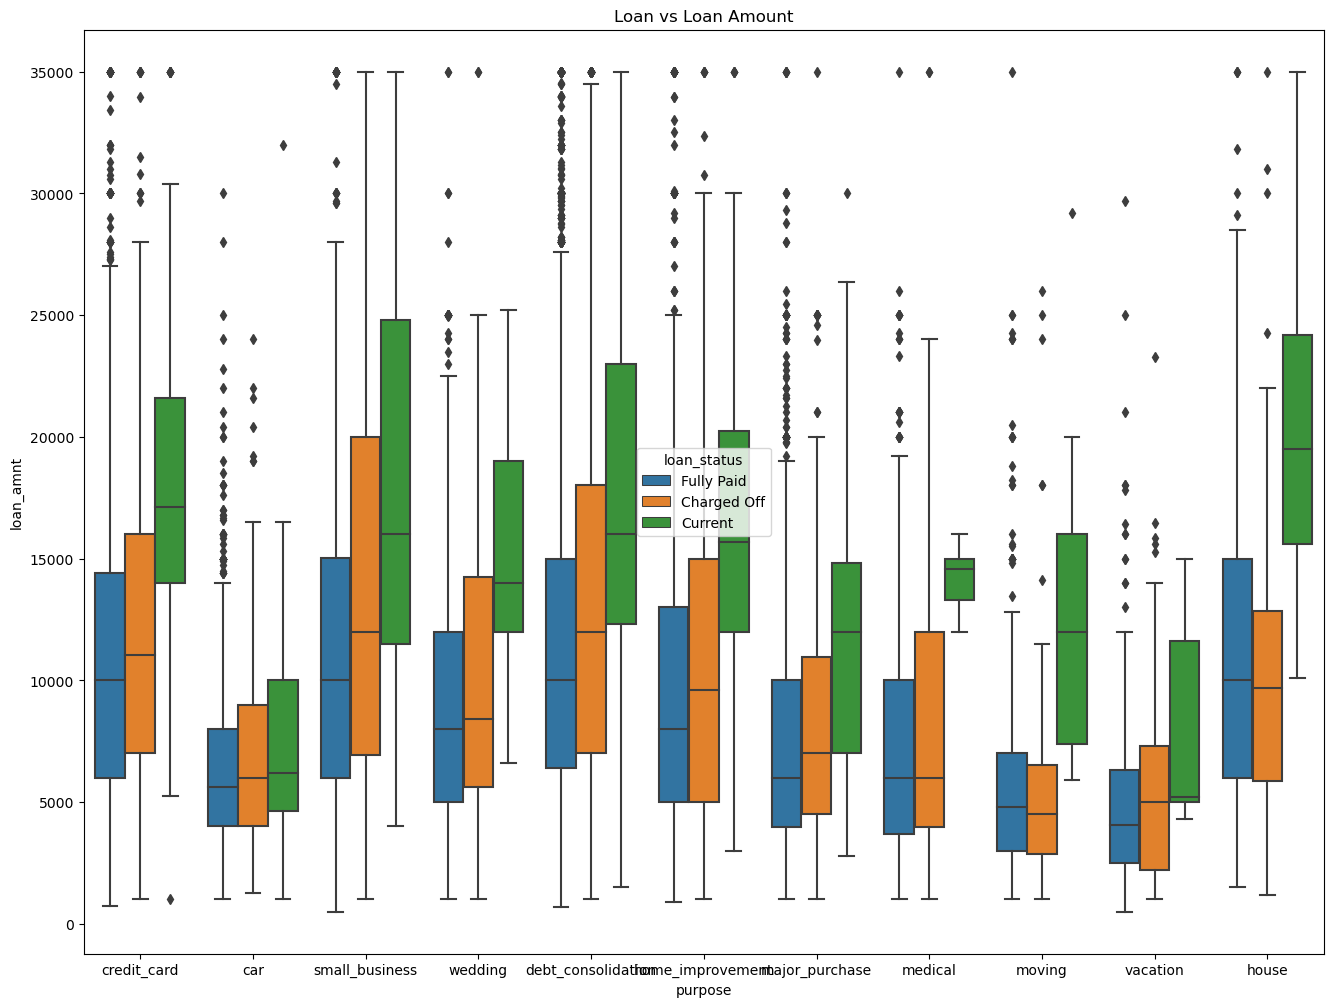

In [54]:
plt.figure(figsize=(16,12))
sns.boxplot(data =df, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Loan vs Loan Amount')
plt.show()


* max amount of  loan taken  by small buisnesses

* max loan is fully paid by debt consolidations




# loan correlation

In [55]:
loan_correlation = df.corr()
loan_correlation

C:\Users\Amit Ranjan\AppData\Local\Temp\ipykernel_18452\1125459228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_correlation = df.corr()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981351,0.938247,0.304751,0.926058,0.392838,0.110436,-0.042074,0.000404,0.156058,-0.050449,0.326364,0.232343,0.194031,0.193840,0.872831,0.839646,0.833382,0.725479,0.041830,0.138493,0.071490,0.430178,-0.036379
funded_amnt,0.981351,1.000000,0.956475,0.310506,0.952331,0.389349,0.109358,-0.041947,0.001278,0.154045,-0.050784,0.318213,0.226546,0.195837,0.195644,0.889546,0.856087,0.851342,0.733988,0.044707,0.141040,0.074492,0.435260,-0.036817
funded_amnt_inv,0.938247,0.956475,1.000000,0.304356,0.898225,0.372053,0.114812,-0.046470,-0.011901,0.142123,-0.051200,0.297733,0.219790,0.204549,0.204548,0.868196,0.900880,0.827737,0.727956,0.022157,0.126887,0.059122,0.427233,-0.040353
int_rate,0.304751,0.310506,0.304356,1.000000,0.280577,0.060498,0.110339,0.147251,0.136022,-0.005244,0.105760,0.083242,-0.062552,0.127512,0.127709,0.298831,0.294413,0.173832,0.529063,0.087487,0.121872,0.065405,0.146507,0.089292
installment,0.926058,0.952331,0.898225,0.280577,1.000000,0.387437,0.095847,-0.028972,0.001193,0.149799,-0.045007,0.316971,0.203027,0.123447,0.123396,0.842489,0.800730,0.832692,0.626851,0.053920,0.122539,0.075470,0.379892,-0.031846
annual_inc,0.392838,0.389349,0.372053,0.060498,0.387437,1.000000,-0.058809,0.023728,0.034502,0.256855,-0.002933,0.368502,0.372101,0.054775,0.054570,0.367644,0.353094,0.369887,0.260972,0.004706,0.035272,0.014507,0.199944,-0.000328
dti,0.110436,0.109358,0.114812,0.110339,0.095847,-0.058809,1.000000,-0.035590,0.003154,0.300443,-0.012153,0.286661,0.248776,0.045826,0.045688,0.107442,0.111387,0.084723,0.134816,-0.010548,0.027270,0.013068,0.030255,-0.000673
delinq_2yrs,-0.042074,-0.041947,-0.046470,0.147251,-0.028972,0.023728,-0.035590,1.000000,0.009517,0.013515,0.008083,-0.070867,0.063533,-0.007942,-0.007867,-0.033463,-0.038636,-0.047911,0.011160,0.028613,0.009549,0.009791,-0.018987,0.004594
inq_last_6mths,0.000404,0.001278,-0.011901,0.136022,0.001193,0.034502,0.003154,0.009517,1.000000,0.092229,0.026053,-0.024978,0.110589,-0.006674,-0.006361,-0.020325,-0.028476,-0.035214,0.019394,0.031279,0.019896,0.011723,0.021609,0.016561
open_acc,0.156058,0.154045,0.142123,-0.005244,0.149799,0.256855,0.300443,0.013515,0.092229,1.000000,0.008887,0.277751,0.678137,0.021414,0.021255,0.139293,0.129679,0.139261,0.101364,-0.014470,0.013147,0.003253,0.070506,0.013557


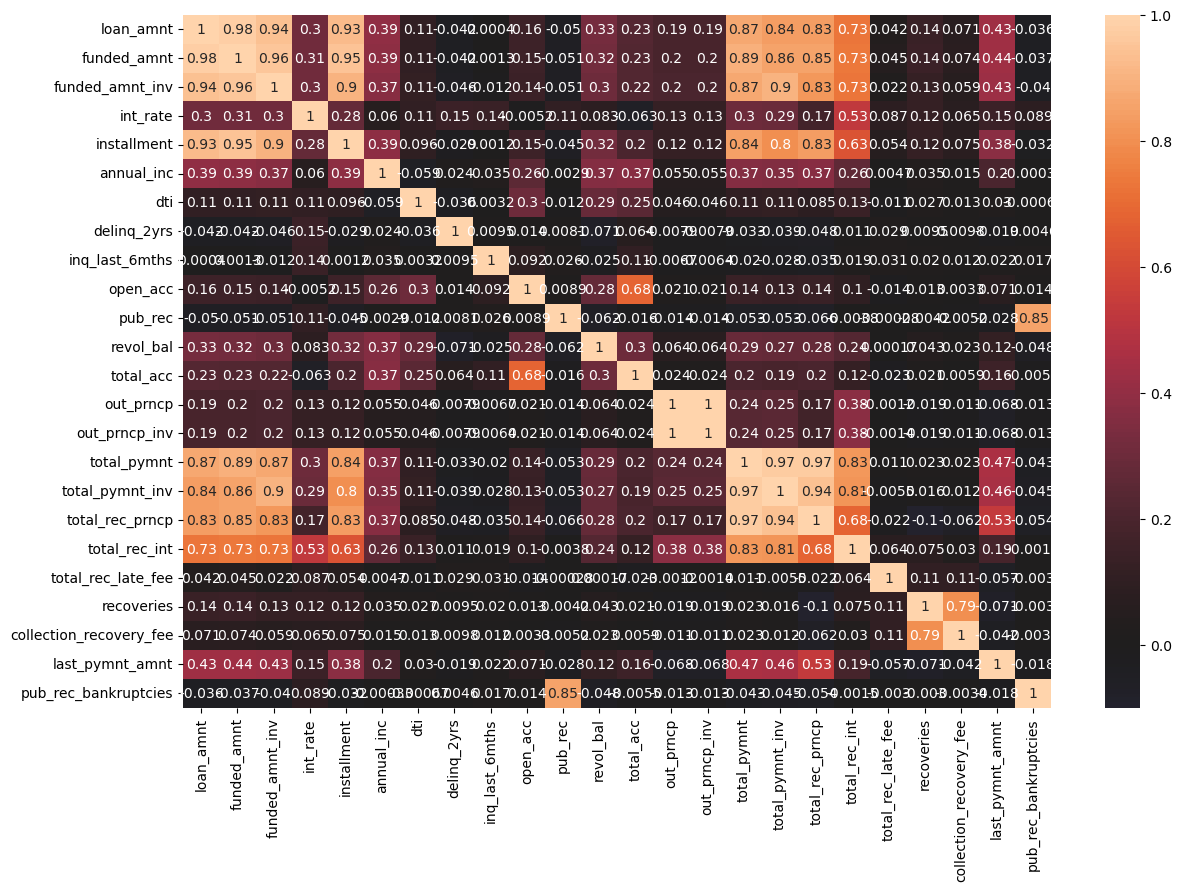

In [56]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True,center=0)
plt.show()